# Leaf area distribution for the modelled system figure

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
from datetime import datetime, timedelta
import pandas as pd
import os
import xarray as xr
import matplotlib.dates as mdates

%matplotlib widget

In [2]:
sns.set_context('poster', font_scale=1.5)

## Set pyAPES to path from env file

In [3]:
# setting path
import sys
import os
from dotenv import load_dotenv

load_dotenv()
pyAPES_main_folder = os.getenv('pyAPES_main_folder')

sys.path.append(pyAPES_main_folder)

# force iPython re-import modules at each call
%load_ext autoreload
%autoreload 2

In [4]:
from pyAPES.utils.utilities import lad_weibul, lad_constant

# Define canopy grid

In [5]:
canopy_grid = np.linspace(0,25,101)

# Define species LAD

In [6]:
pines = lad_weibul(z=canopy_grid, LAI=0.75, h=16, hb=6, species='pine')
pines = pines * 1


In [7]:
spruces = lad_weibul(z=canopy_grid, LAI=0.5, h=6, hb=1.5, species='spruce')
spruces = spruces*2


In [8]:
birch = lad_weibul(z=canopy_grid, h=17, hb=4, LAI=1, species='birch')


In [9]:
field_layer = lad_constant(canopy_grid, 0.25, 0.5, -0.1)


In [10]:
total = pines + birch + spruces + field_layer

# LAD figure

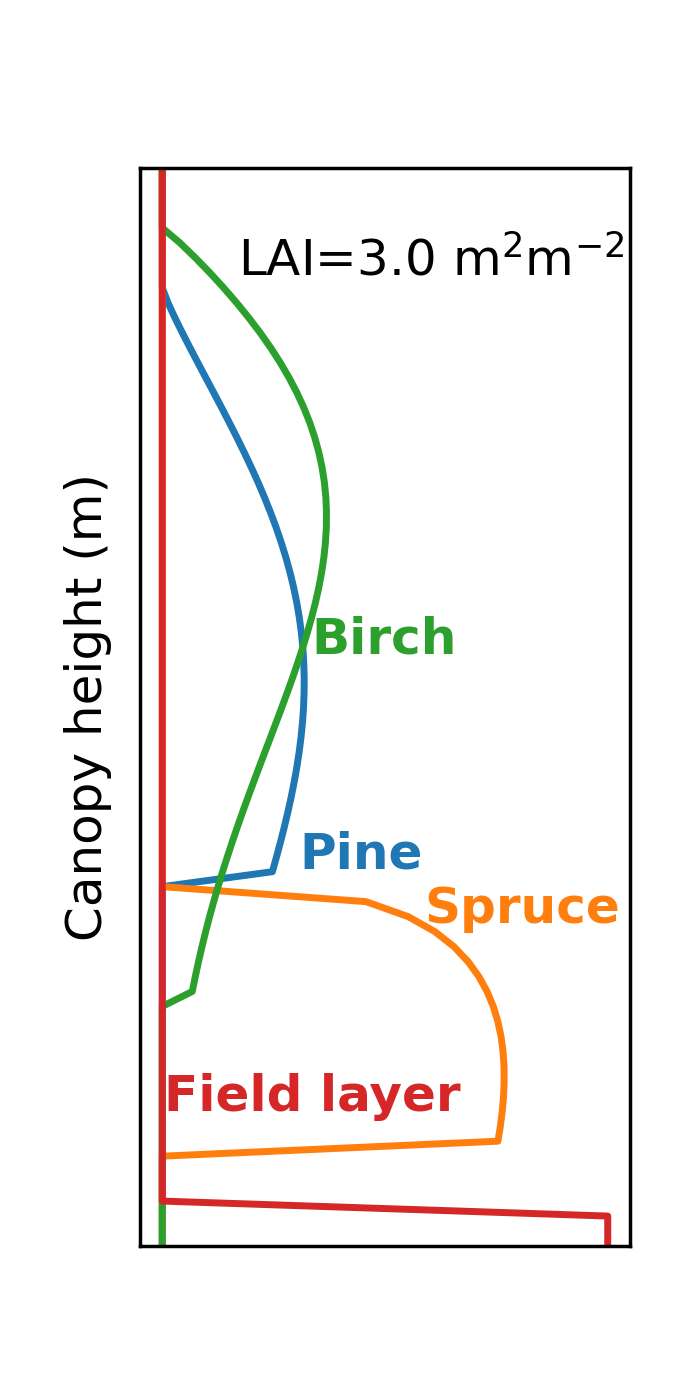

In [77]:
fig, ax = plt.subplots(figsize=(7,14))
fig.subplots_adjust(left=0.2)
lw = 5
ax.plot(pines, canopy_grid, linewidth=lw)
ax.plot(spruces, canopy_grid, linewidth=lw)
ax.plot(birch, canopy_grid, linewidth=lw)
ax.plot(field_layer, canopy_grid, linewidth=lw)
#ax.plot(total, canopy_grid, linestyle=':', color='k', linewidth=lw)

ax.text(0.2, 0.9, f'LAI={np.sum(total*0.25)} m$^{{2}}$m$^{{-2}}$', transform=ax.transAxes)
#ax.legend(bbox_to_anchor=(0.25, 0.58))
#ax.set_xlabel('LAD (m$^2$m$^{-3}$)')
ax.set_ylabel('Canopy height (m)', labelpad=20)

# set texts
text_places = [[0.325, 0.35], [0.58, 0.3], [0.35, 0.55], [0.05, 0.125]]
texts = [r'Pine', r'Spruce', r'Birch', 'Field layer']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i in range(len(texts)):
    ax.text(text_places[i][0], text_places[i][1], texts[i], transform=ax.transAxes, color=colors[i], fontsize=36, fontweight='bold')

ax.set_ylim([0, 18])
ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False)         # ticks along the top edge are off)
ax.set_yticks([])
plt.savefig('lad.svg',format='svg')
plt.savefig('lad.png', format='png')

In [12]:
data = xr.open_dataset('results/lettosuo_test_4.nc')

In [13]:
data.canopy_h2o

<xarray.DataArray 'canopy_h2o' (date: 17473, simulation: 1, canopy: 101)> Size: 7MB
[1764773 values with dtype=float32]
Coordinates:
  * date     (date) datetime64[ns] 140kB 2018-01-01 ... 2018-12-31
Dimensions without coordinates: simulation, canopy
Attributes:
    units:    H2O concentration [mol mol-1]

# FIGURE shaded leaf profile

In [14]:
data.date[8760]

<xarray.DataArray 'date' ()> Size: 8B
array('2018-07-02T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    date     datetime64[ns] 8B 2018-07-02T12:00:00

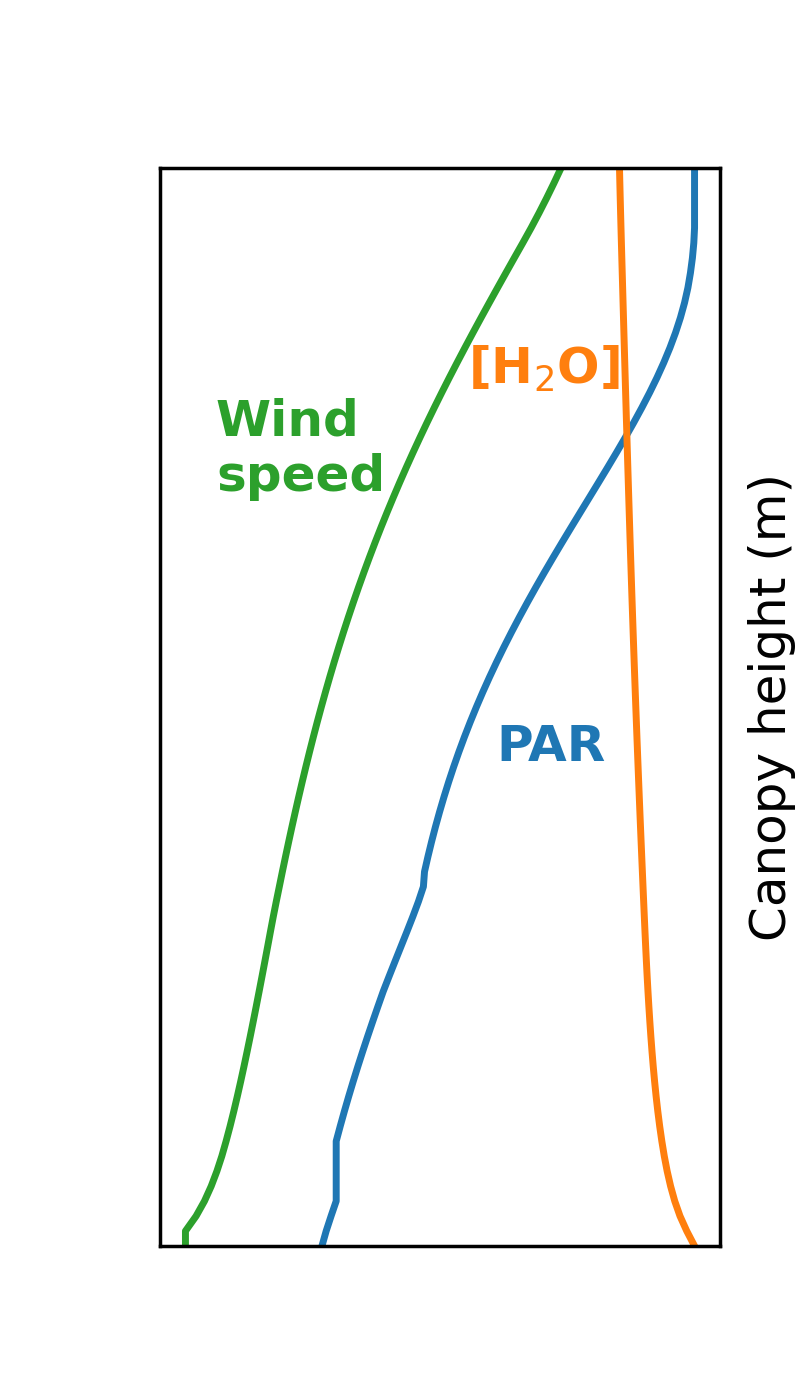

In [ ]:
fig, ax = plt.subplots(figsize=(8,14))
fig.subplots_adjust(left=0.2)
lw = 5
ind = 8760 - 48
Tleaf = data.canopy_Tleaf[ind, 0, :].data
par = data.canopy_par_absorbed_shaded[ind, 0, :].data * (1-data.canopy_sunlit_fraction[ind, 0, :].data) + data.canopy_par_absorbed_sunlit[ind, 0, :].data * data.canopy_sunlit_fraction[ind, 0, :].data
w = data.canopy_h2o[ind, 0, :].data
u = data.canopy_wind_speed[ind, 0, :].data

#ax.plot(Tleaf/np.nanmax(Tleaf), canopy_grid, label='T$_{\mathrm{leaf}}$', linewidth=lw)
ax.plot(par/np.nanmax(par), canopy_grid, label='PAR', linewidth=lw)
ax.plot(w/np.nanmax(w), canopy_grid, label='[H$_2$O]', linewidth=lw)
ax.plot(u/np.nanmax(u), canopy_grid, label='Wind speed', linewidth=lw)
#ax.legend(bbox_to_anchor=(0.7, 0.7), fontsize=28)
ax.set_ylabel('Canopy height (m)', labelpad=20)
#ax.set_xlabel('Normalized profile (-)')
#plt.savefig('micromet.svg',format='svg')
# set texts
text_places = [[0.72, 0.1], [0.6, 0.45], [0.55, 0.8], [0.1, 0.7]]
texts = [r'T$_{\mathrm{leaf}}$', r'PAR', r'[H$_2$O]', 'Wind\nspeed']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i in range(len(texts)-1):
    ax.text(text_places[i+1][0], text_places[i+1][1], texts[i+1], transform=ax.transAxes, color=colors[i], fontsize=36, fontweight='bold')
ax.set_ylim([0, 18])
ax.xaxis.set_visible(False)
ax.yaxis.set_label_position('right')

ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False)         # ticks along the top edge are off)
_ = ax.set_yticks([])

# plt.savefig('micromet.png', format='png')
# plt.savefig('micromet.svg', format='svg')

# FIGURE GPP

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/var/folders/_7/7fgf24sd5ggbyr5x9kzrwz7c0000gn/T/ipykernel_17286/3108736884.py:19: SyntaxWarning: invalid escape sequence '\m'
  im.colorbar.set_label('GPP ($\mu$mol m$^{-3}$ s$^{-1}$)', fontsize=32)
/var/folders/_7/7fgf24sd5ggbyr5x9kzrwz7c0000gn/T/ipykernel_17286/3108736884.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlabels)
/var/folders/_7/7fgf24sd5ggbyr5x9kzrwz7c0000gn/T/ipykernel_17286/3108736884.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([-50.,0., 12.5, 25., 150.])


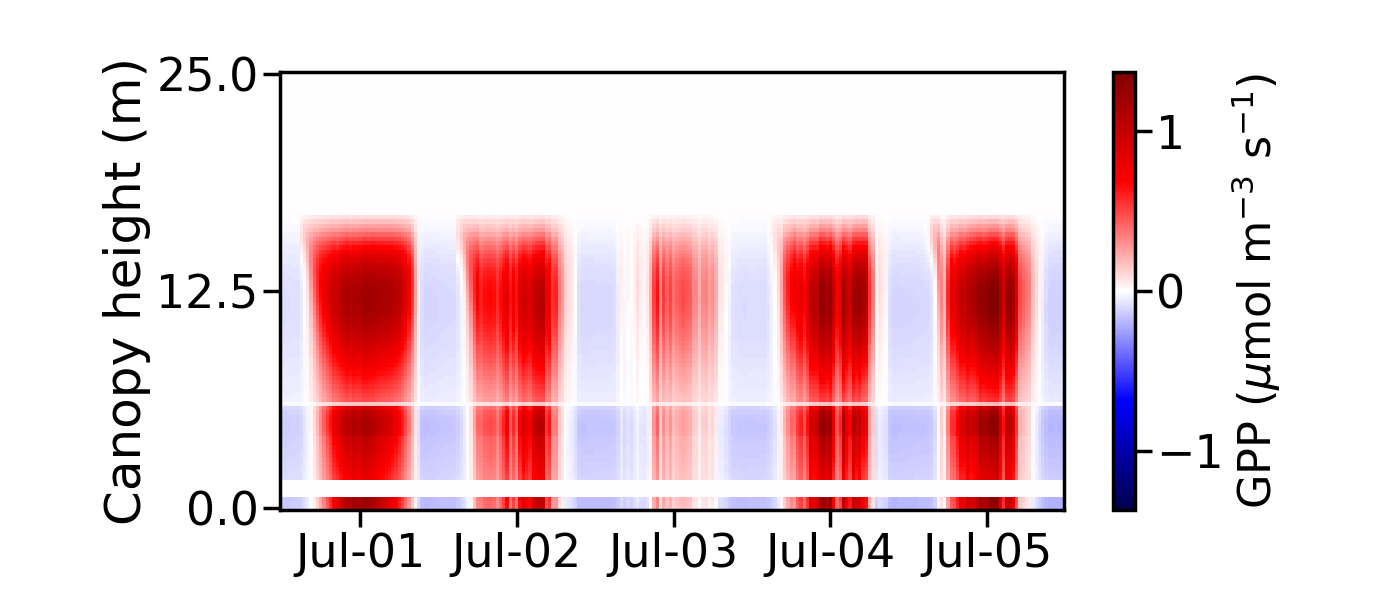

In [16]:
fig, ax = plt.subplots(figsize=(14,6))
fig.subplots_adjust(left=0.2, bottom=0.15)
gpp = data.pt_net_co2.sel(date=slice('2018-07-01','2018-07-05')).sum(dim='planttype')
im = (gpp[:, 0, :].T).plot(ax=ax, cmap='seismic')

xticks = ax.get_xticks()
xlabels = ax.get_xticklabels()

xticks = xticks[1::2]
xlabels = xlabels[1::2]

ax.set_xticklabels(xlabels)
ax.set_xticks(xticks)

#ax.set_yticks([-50, 0, 50, 100, 150])
ax.set_yticklabels([-50.,0., 12.5, 25., 150.])
ax.set_xlabel('')
ax.set_ylabel('Canopy height (m)')
im.colorbar.set_label('GPP ($\mu$mol m$^{-3}$ s$^{-1}$)', fontsize=32)
_ = ax.set_xticklabels(['Jul-01','Jul-02','Jul-03','Jul-04','Jul-05'])
#plt.savefig('gpp.svg', format='svg')
#plt.savefig('gpp.png', format='png')

# FIGURE LE

In [17]:
LE = data.pt_latent_heat_sunlit * data.canopy_sunlit_fraction + data.pt_latent_heat_shaded*(1-data.canopy_sunlit_fraction)
LE = LE.sum(dim='planttype')

/var/folders/_7/7fgf24sd5ggbyr5x9kzrwz7c0000gn/T/ipykernel_17286/3569463895.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlabels)
/var/folders/_7/7fgf24sd5ggbyr5x9kzrwz7c0000gn/T/ipykernel_17286/3569463895.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([-50.,0., 12.5, 25., 150.])


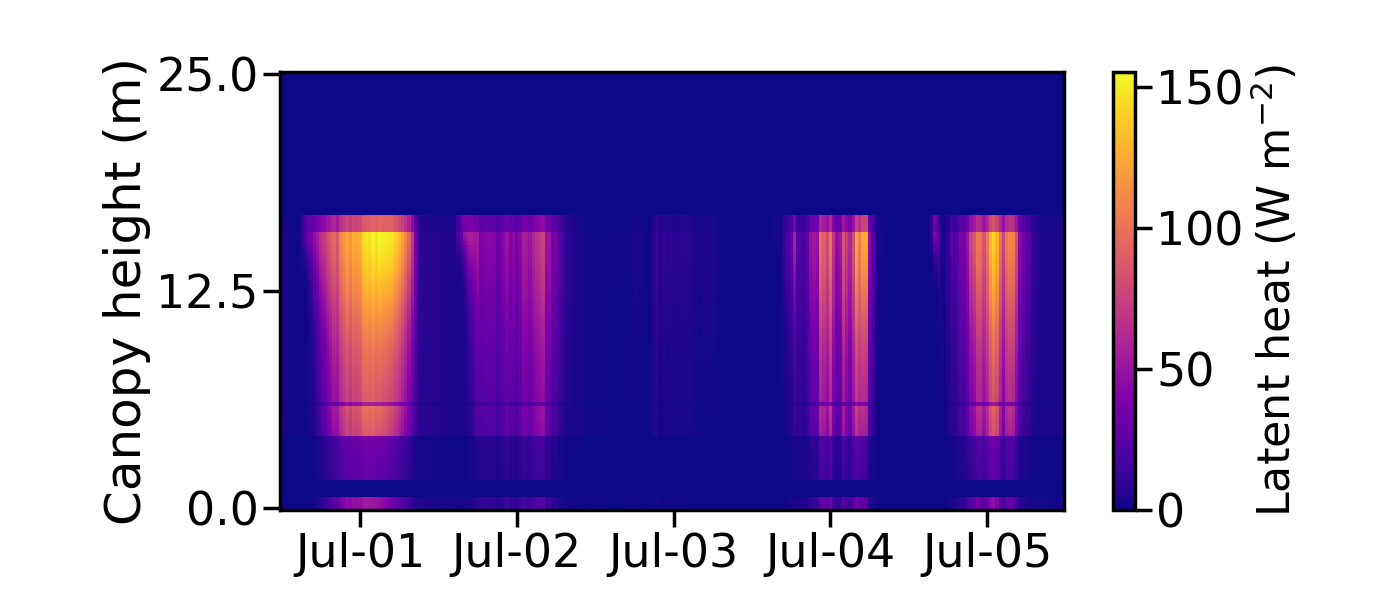

In [18]:
fig, ax = plt.subplots(figsize=(14,6))
fig.subplots_adjust(left=0.2, bottom=0.15)
LE = LE.sel(date=slice('2018-07-01','2018-07-05'))
im = (LE[:, 0, :].T).plot(ax=ax, cmap='plasma')

xticks = ax.get_xticks()
xlabels = ax.get_xticklabels()

xticks = xticks[1::2]
xlabels = xlabels[1::2]

ax.set_xticklabels(xlabels)
ax.set_xticks(xticks)

#ax.set_yticks([-50, 0, 50, 100, 150])
ax.set_yticklabels([-50.,0., 12.5, 25., 150.])
ax.set_xlabel('')
ax.set_ylabel('Canopy height (m)')
im.colorbar.set_label('Latent heat (W m$^{-2}$)', fontsize=32)
_ = ax.set_xticklabels(['Jul-01','Jul-02','Jul-03','Jul-04','Jul-05'])
#plt.savefig('gpp.svg', format='svg')
#plt.savefig('gpp.png', format='png')

# FIGURE INCIDENT DIFFUSE AND DIRECT PAR

In [19]:
# function to read forcing data. See 'forcing/forcing_info.txt' for model forcing variable names and units!
from pyAPES.utils.iotools import read_forcing

# import the multi-layer model (mlm) driver
from pyAPES.pyAPES_MLM import driver

/Users/opa/pyAPES_main/pyAPES/bottomlayer/organiclayer.py:937: SyntaxWarning: invalid escape sequence '\ '
  """
/Users/opa/pyAPES_main/pyAPES/bottomlayer/carbon.py:106: SyntaxWarning: invalid escape sequence '\ '
  """
/Users/opa/pyAPES_main/pyAPES/snow/snowpack.py:21: SyntaxWarning: invalid escape sequence '\ '
  """
/Users/opa/pyAPES_main/pyAPES/soil/water.py:1331: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\psi$ $(m)$', fontsize=14)


In [20]:
forcing_file = '/Users/opa/pyAPES_Opa/forcing/Lettosuo/Lettosuo_forcing_2010_2023.csv'

gpara = {'dt' : 1800.0,  # timestep in forcing data file [s]
         'start_time' : "2018-07-01",  # start time of simulation [yyyy-mm-dd]
         'end_time' : "2018-07-06",  # end time of simulation [yyyy-mm-dd]
         'forc_filename' : forcing_file, # forcing data file
         'results_directory':'results/'
         }

In [21]:
forcing = read_forcing(
    forcing_file=gpara['forc_filename'],
    start_time=gpara['start_time'],
    end_time=gpara['end_time'],
    dt=gpara['dt']
)

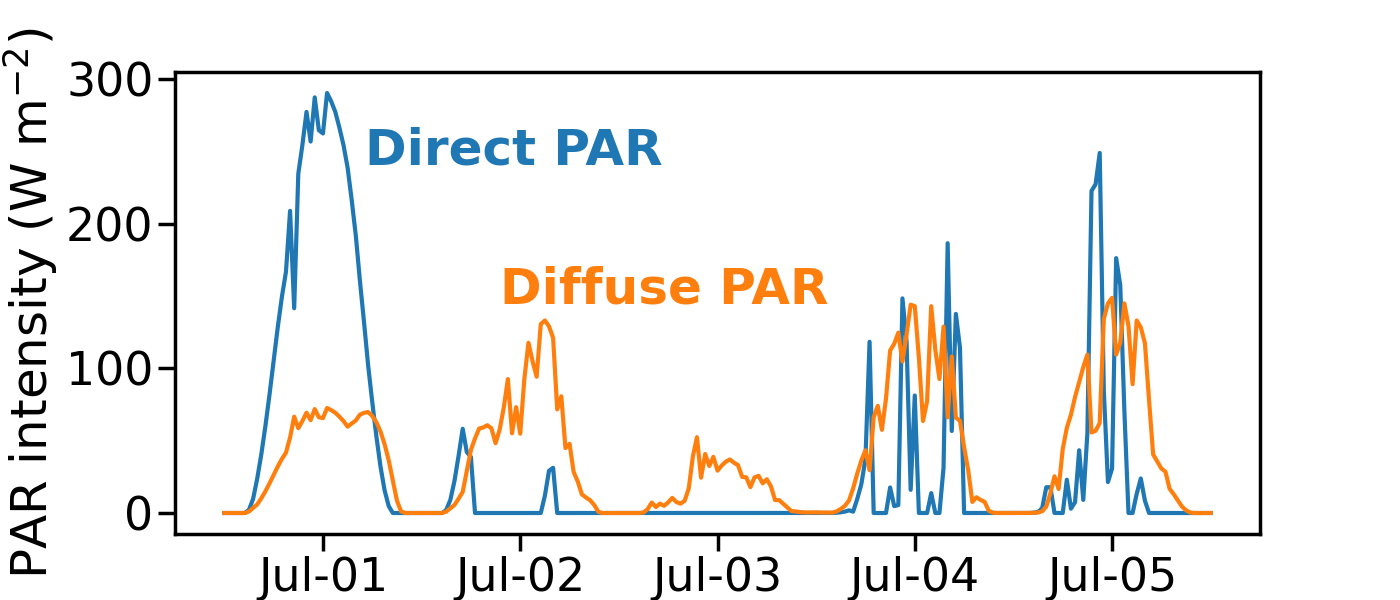

In [22]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(forcing.index, forcing.dirPar)
ax.plot(forcing.index, forcing.diffPar)

ax.set_xticks([datetime(2018,7,1,12), datetime(2018,7,2,12), datetime(2018,7,3,12), datetime(2018,7,4,12), datetime(2018,7,5,12)])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

ax.set_ylabel('PAR intensity (W m$^{-2}$)')

text_places = [[0.175, 0.8], [0.3, 0.5]]
texts = [r'Direct PAR', r'Diffuse PAR']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i in range(len(texts)):
    ax.text(text_places[i][0], text_places[i][1], texts[i], transform=ax.transAxes, color=colors[i], fontsize=36, fontweight='bold')

# FIGURE INTERCEPTION

In [23]:
W = data.canopy_interception_storage_ml

/var/folders/_7/7fgf24sd5ggbyr5x9kzrwz7c0000gn/T/ipykernel_17286/2005154611.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlabels)
/var/folders/_7/7fgf24sd5ggbyr5x9kzrwz7c0000gn/T/ipykernel_17286/2005154611.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([-50.,0., 12.5, 25., 150.])


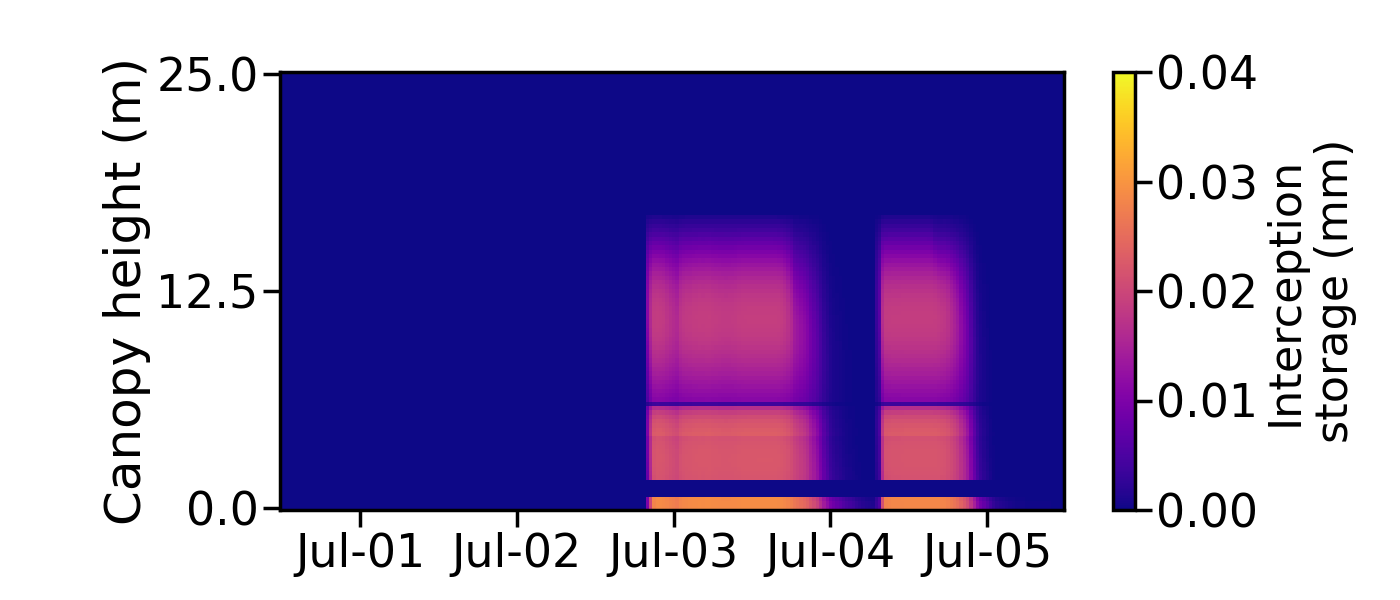

In [24]:
fig, ax = plt.subplots(figsize=(14,6))
fig.subplots_adjust(left=0.2, bottom=0.15)
W = W.sel(date=slice('2018-07-01','2018-07-05'))
im = (W[:, 0, :].T).plot(ax=ax, cmap='plasma', vmin=0, vmax=0.04)

xticks = ax.get_xticks()
xlabels = ax.get_xticklabels()

xticks = xticks[1::2]
xlabels = xlabels[1::2]

ax.set_xticklabels(xlabels)
ax.set_xticks(xticks)

#ax.set_yticks([-50, 0, 50, 100, 150])
ax.set_yticklabels([-50.,0., 12.5, 25., 150.])
ax.set_xlabel('')
ax.set_ylabel('Canopy height (m)')
im.colorbar.set_label('Interception\nstorage (mm)', fontsize=32)
_ = ax.set_xticklabels(['Jul-01','Jul-02','Jul-03','Jul-04','Jul-05'])
#plt.savefig('gpp.svg', format='svg')
#plt.savefig('gpp.png', format='png')

# FIGURE annual cycles

In [25]:
data.date[ind]

<xarray.DataArray 'date' ()> Size: 8B
array('2018-07-01T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    date     datetime64[ns] 8B 2018-07-01T12:00:00

In [66]:
date_length = data.date.shape[0]
date_mid_point = int(date_length/2)
dates_first_part = data.date[:date_mid_point].data
dates_second_part = data.date[date_mid_point:].data
dates_first_part = dates_first_part + np.timedelta64(365,'D')
dates = np.concatenate((dates_second_part, dates_first_part))

swe_first_part = data.ffloor_snow_water_equivalent[:date_mid_point, 0].data
swe_second_part = data.ffloor_snow_water_equivalent[date_mid_point:, 0].data
swe = np.concatenate((swe_second_part, swe_first_part))
swe = swe/np.max(swe)

lai_first_part = data.canopy_LAI[:date_mid_point, 0]
lai_second_part = data.canopy_LAI[date_mid_point:, 0]
lai = np.concatenate((lai_second_part, lai_first_part))
lai = lai/np.max(lai)

ind_stop = -1*3*31*24*2
dates = dates[:ind_stop]
swe = swe[:ind_stop]
lai = lai[:ind_stop]


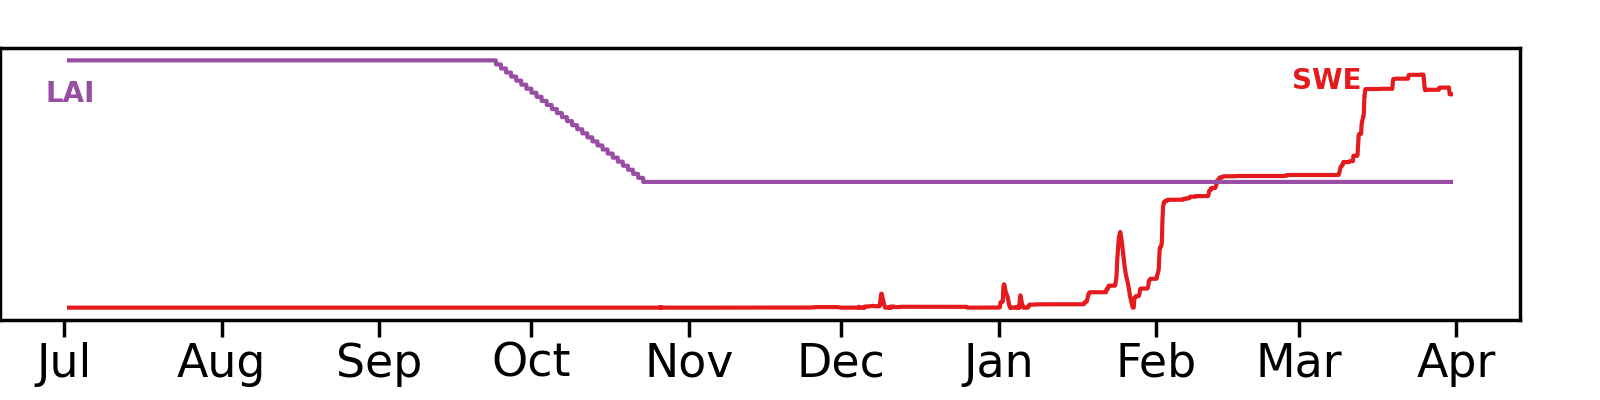

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
fig.subplots_adjust(left=0, bottom=0.2, right=0.95)
colors = plt.cm.Set1(np.linspace(0,1,4))#plt.rcParams['axes.prop_cycle'].by_key()['color']

#data_sel = data.sel(date=slice('2018-06-01', '2018-12-30'))
ax.plot(dates, swe, color=colors[0])
ax.plot(dates, lai, color=colors[1])
# ax.plot(data_sel.date, data_sel.ffloor_snow_water_equivalent[:, 0]/np.max(
#     data_sel.ffloor_snow_water_equivalent[:, 0]), color=colors[0])
#ax.plot(data_sel.date, data_sel.gt_water_content[:, 0, 0]/np.max(
#    data_sel.gt_water_content[:, 0, 0]), color=colors[1])
# ax.plot(data_sel.date,
#         data_sel.canopy_LAI[:, 0]/np.max(data_sel.canopy_LAI[:, 0]), color=colors[1])
#ax.plot(data_sel.date,
#        data_sel.forcing_precipitation[:, 0]/np.max(data_sel.forcing_precipitation[:, 0]), color=colors[3])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylabel('Normalized\nstate (-)')
#rect = plt.Rectangle((datetime(2018,7,1), -0.03), timedelta(days=5), 1.05, facecolor='none', edgecolor='k', linewidth=4)
#ax.set_ylim([-0.05, 1.05])
#ax.add_patch(rect)
# set texts
#text_places = [[0.03, 0.8], [0.3125, 0.2], [0.6, 0.85], [0.8, 0.4]]
#texts = [r'SWE', r'Bryophyte $\theta$', r'LAI', r'Precipitation']

text_places = [[0.85, 0.85], [0.03, 0.8]]
texts = [r'SWE',  r'LAI', ]

for i in range(len(texts)):
    ax.text(text_places[i][0], text_places[i][1], texts[i], transform=ax.transAxes, color=colors[i], fontsize=20, fontweight='bold')

ax.yaxis.set_visible(False)
#plt.savefig('annual_cycles.svg',format='svg')
#plt.savefig('annual_cycles.png', format='png')

# FIGURE T<sub>soil</sub> and $\theta$<sub>soil</sub> profile

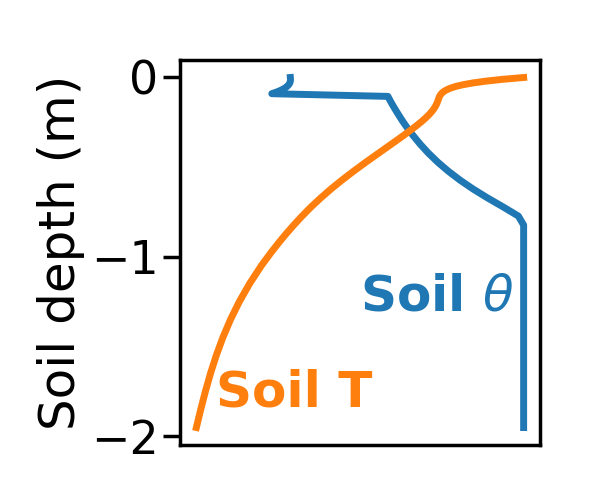

In [27]:
fig, ax = plt.subplots(figsize=(6, 5))
fig.subplots_adjust(left=0.3)
ind = 8760 - 48
ax.plot(data.soil_volumetric_water_content[ind, 0, :]/np.max(data.soil_volumetric_water_content[ind, 0, :]), data.soil_z, linewidth=5)
ax.plot(data.soil_temperature[ind, 0, :]/np.max(data.soil_temperature[ind, 0, :]), data.soil_z, linewidth=5)
ax.set_ylabel('Soil depth (m)')
ax.xaxis.set_visible(False)

text_places = [[0.5, 0.35], [0.1, 0.1]]
texts = [r'Soil $\theta$', 'Soil T']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i in range(len(texts)):
    ax.text(text_places[i][0], text_places[i][1], texts[i], transform=ax.transAxes, color=colors[i], fontsize=36, fontweight='bold')